# Region-based Segmentation

In [1]:
import numpy as np

from skimage import data
from scipy import ndimage
from skimage.filters import sobel
from skimage.morphology import watershed
from skimage.color import label2rgb

import matplotlib.pyplot as plt

(-0.5, 383.5, 302.5, -0.5)

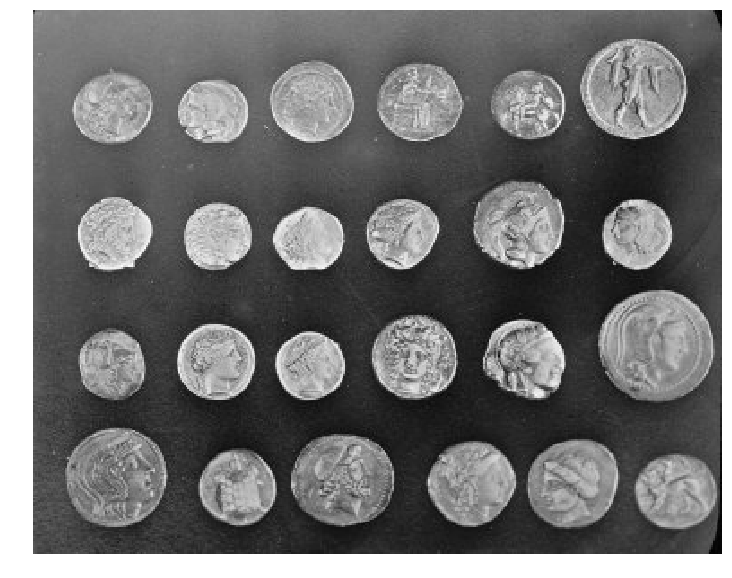

In [2]:
coins = data.coins()

plt.figure(figsize=(16,10))
plt.imshow(coins, cmap='gray')
plt.axis('off')

(-0.5, 383.5, 302.5, -0.5)

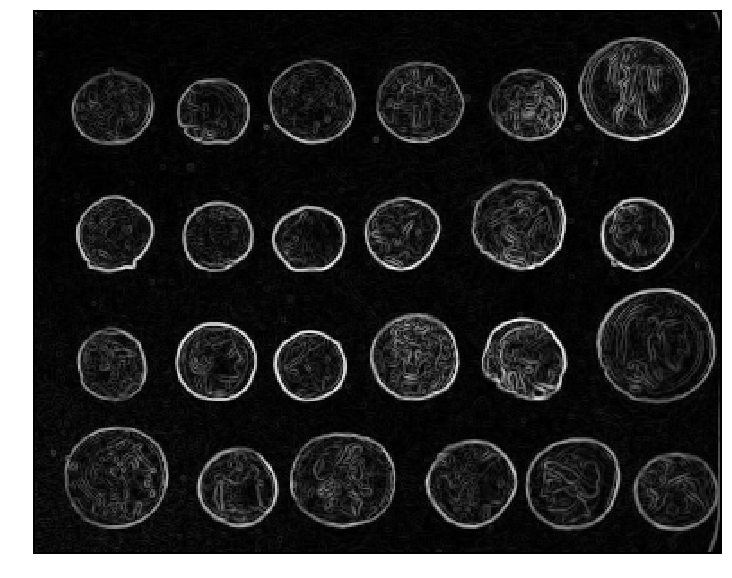

In [3]:
elevation_map = sobel(coins)

plt.figure(figsize=(16,10))
plt.imshow(elevation_map, cmap='gray')
plt.axis('off')

(-0.5, 383.5, 302.5, -0.5)

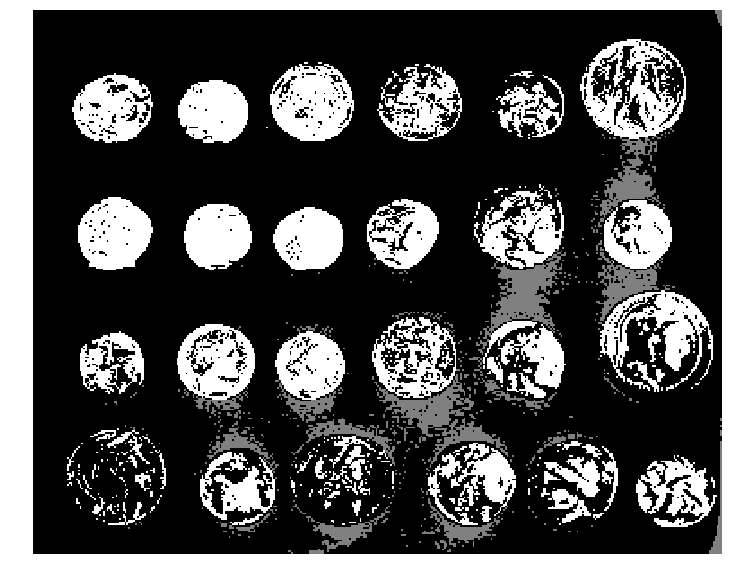

In [4]:
markers = np.zeros_like(coins)
markers[coins < 30] = 1
markers[coins > 150] = 2

plt.figure(figsize=(16,10))
plt.imshow(markers, cmap='gray')
plt.axis('off')

/home/ferdinand/anaconda3/lib/python3.6/site-packages/skimage/util/arraycrop.py:175: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped = np.array(ar[slices], order=order, copy=True)


(-0.5, 383.5, 302.5, -0.5)

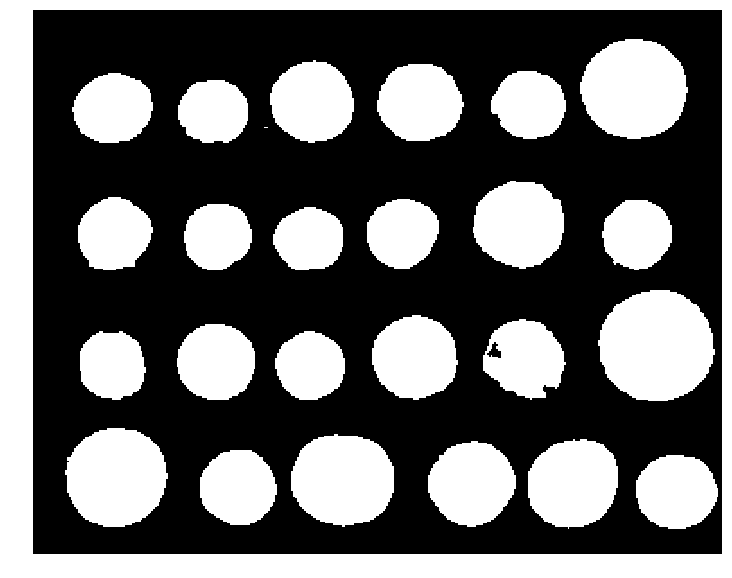

In [5]:
segmentation = watershed(elevation_map, markers)

plt.figure(figsize=(16,10))
plt.imshow(segmentation, cmap='gray')
plt.axis('off')

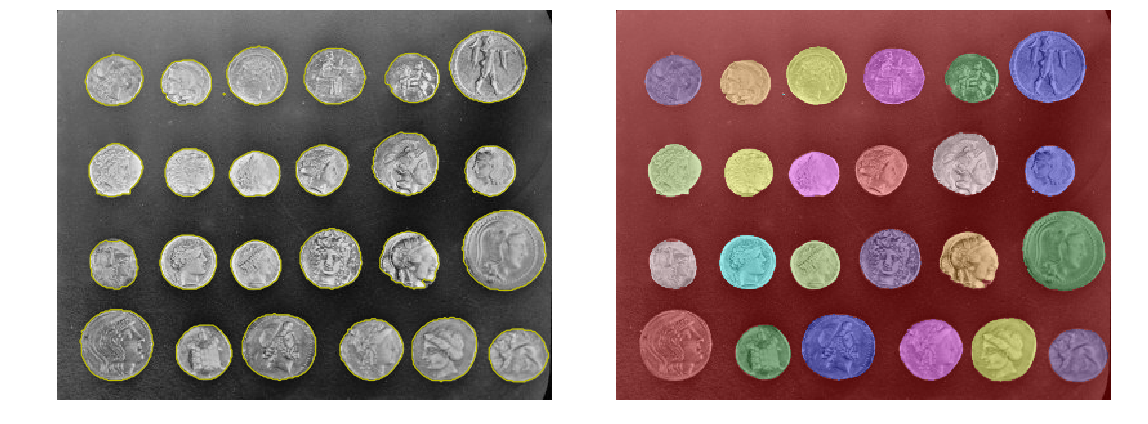

In [6]:
segmentation = ndimage.binary_fill_holes(segmentation - 1)
labeled_coins, _ = ndimage.label(segmentation)
image_label_overlay = label2rgb(labeled_coins, image=coins)

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
axes[0].imshow(coins, cmap='gray')
axes[0].contour(segmentation, [0.5], linewidths=1.2, colors='y')
axes[1].imshow(image_label_overlay, interpolation='nearest')

for a in axes:
    a.axis('off')

plt.tight_layout()

plt.show()

# Snake

In [7]:
from skimage.color import rgb2gray
from skimage.filters import gaussian
from skimage.segmentation import active_contour

(-0.5, 511.5, 511.5, -0.5)

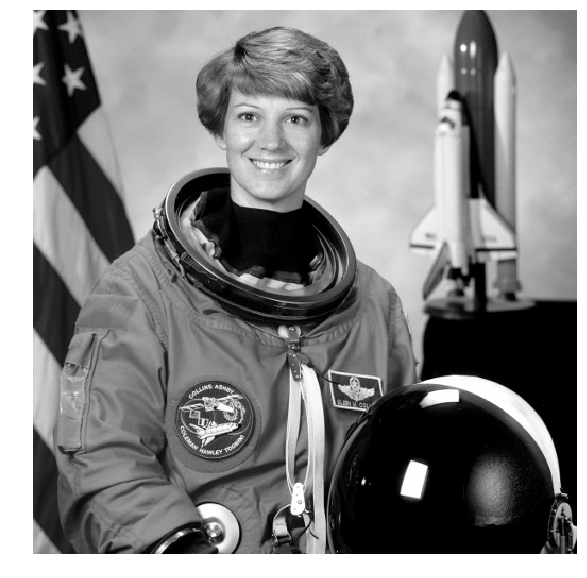

In [8]:
astronaut = data.astronaut()
astronaut = rgb2gray(astronaut)

plt.figure(figsize=(10,10))
plt.imshow(astronaut, cmap='gray')
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

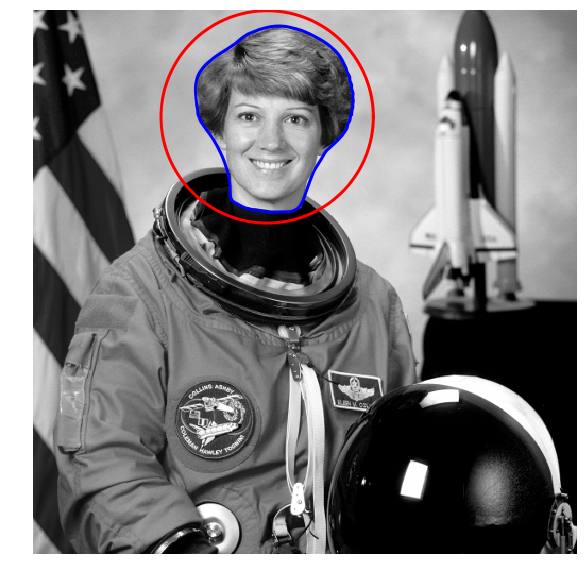

In [9]:
s = np.linspace(0, 2*np.pi, 400)
x = 220 + 100*np.cos(s)
y = 100 + 100*np.sin(s)
init = np.array([x, y]).T

snake = active_contour(gaussian(astronaut, 3),init, alpha=0.015, beta=10, gamma=0.001)

plt.figure(figsize=(10,10))
plt.imshow(astronaut, cmap='gray')
plt.plot(init[:,0], init[:,1], 'r', lw=3)
plt.plot(snake[:,0], snake[:,1], 'b', lw=3)
plt.axis('off')